In [1]:
import os
import glob
import json

import cv2
import pandas as pd 
from pycocotools.coco import COCO
from PIL import Image
import numpy as np 
import skimage.io as io
from matplotlib import pyplot as plt
from pprint import pprint
%matplotlib inline

In [2]:
with open('annotations.json', 'r', encoding='utf8') as file:
    data = json.load(file)

In [3]:
data.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [4]:
print(len(data['images']))
# Let's print out the first few image filenames/paths
for img in data['images'][:10]:
    print(img['file_name'])


8729
images/t001/CAluWEgwPX.JPG
images/t001/EKyrFKHQzh.JPG
images/t001/ELAvEqeXxT.JPG
images/t001/IxRLFwTGCv.JPG
images/t001/LKCJAhfLBJ.JPG
images/t001/LZystXlIqe.JPG
images/t001/OiaMESWPyh.JPG
images/t001/VMyJozldvy.jpg
images/t001/XhbkFIOvZr.JPG
images/t001/ZKnMahXQgJ.JPG


In [5]:
# Let's see first annotation
for ann in data['annotations'][:1]:
    for key, value in ann.items():
        print(key)
        print(value)
        print("********")
    print("--------------------------------")

id
1
********
image_id
1
********
category_id
3
********
segmentation
{'counts': [858927, 7, 1322, 23, 1306, 34, 1298, 36, 1296, 39, 1292, 42, 1291, 43, 1289, 45, 1287, 47, 1285, 48, 1285, 49, 1283, 51, 1281, 53, 1280, 54, 1278, 56, 1277, 56, 1277, 57, 1275, 58, 1274, 60, 1273, 61, 1272, 61, 1272, 62, 1270, 63, 1269, 64, 1268, 65, 1268, 65, 1268, 66, 1267, 67, 1266, 67, 1265, 68, 1264, 69, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1263, 70, 1262, 71, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1261, 72, 1260, 73, 1260, 73, 1260, 73, 1259, 74, 1258, 75, 1258, 74, 1259, 73, 1260, 72, 1261, 71, 1262, 69, 1263, 69, 1264, 68, 1265, 66, 1266, 64, 1269, 63, 1269, 61, 1272, 59, 1274, 58, 1275, 55, 1278, 52, 1281, 15, 8, 25, 1285, 12, 16, 17, 1289, 9, 24, 3, 1297, 7, 1327, 4, 1715124], 'size': [1333, 2000]}
********
area
4065.0
********
bbox
[644.0, 441.0, 70.0, 78.0]
********
iscrowd
1
********
attributes
{'orientation': 'left', 'occluded': False}
********
-------------

In [6]:
# initialise COCO API for annotations
coco = COCO('annotations.json')

loading annotations into memory...
Done (t=2.43s)
creating index...
index created!


In [7]:
for key in coco.anns.keys():
    pprint(coco.anns[key])
    break 

{'area': 4065.0,
 'attributes': {'occluded': False, 'orientation': 'left'},
 'bbox': [644.0, 441.0, 70.0, 78.0],
 'category_id': 3,
 'id': 1,
 'image_id': 1,
 'iscrowd': 1,
 'segmentation': {'counts': [858927,
                             7,
                             1322,
                             23,
                             1306,
                             34,
                             1298,
                             36,
                             1296,
                             39,
                             1292,
                             42,
                             1291,
                             43,
                             1289,
                             45,
                             1287,
                             47,
                             1285,
                             48,
                             1285,
                             49,
                             1283,
                             51,
          

In [8]:
for i in range(1,4):
    print(coco.cats[i])

{'id': 1, 'name': 'turtle', 'supercategory': ''}
{'id': 2, 'name': 'flipper', 'supercategory': ''}
{'id': 3, 'name': 'head', 'supercategory': ''}


In [9]:
# you can also get all categories using coco.getCatIds
coco.getCatIds()

[1, 2, 3]

In [10]:
# get metadata of coco categories
coco.loadCats(coco.getCatIds()) # returns dictionary

[{'id': 1, 'name': 'turtle', 'supercategory': ''},
 {'id': 2, 'name': 'flipper', 'supercategory': ''},
 {'id': 3, 'name': 'head', 'supercategory': ''}]

In [11]:
for key in coco.imgs.keys():
    pprint(coco.imgs[key])
    break

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t001/CAluWEgwPX.JPG',
 'flickr_url': '',
 'height': 1333,
 'id': 1,
 'identity': 't001',
 'license': 0,
 'timestamp': '2014:07:14 14:49:45',
 'width': 2000}


In [121]:
im = coco.loadImgs(4103)[0]
pprint(im)

{'coco_url': '',
 'date_captured': 0,
 'file_name': 'images/t234/FTSuKddpLd.jpeg',
 'flickr_url': '',
 'height': 2000,
 'id': 4103,
 'identity': 't234',
 'license': 0,
 'timestamp': '2021:06:25 17:42:38',
 'width': 1333}


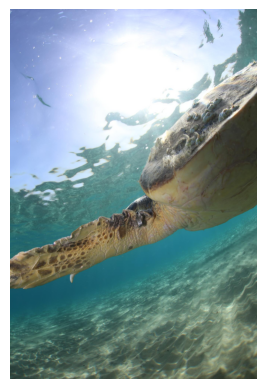

In [122]:
I = io.imread(im['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [52]:
import traceback

for image_id in range(1, len(data['images'])):
    try:
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        
        # 检查是否有3个类别
        if len(cat_ids) == 3:
            anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
            anns = coco.loadAnns(anns_ids)
            if anns:
                mask = coco.annToMask(anns[0])
                for i in range(len(anns)):
                    mask += coco.annToMask(anns[i])
                np.save(f"./images_label_id/{image_id}_mask.npy", mask) 
            else:
                print(f"No annotations for image_id: {image_id}")
        else:
            print(f'{image_id} categories are more than 3')
    except Exception as e:
        print(f"Error in image_id {image_id}: {e}")
        traceback.print_exc()  # 打印详细的异常信息
        break

No annotations for image_id: 1
No annotations for image_id: 2
No annotations for image_id: 3
No annotations for image_id: 4
No annotations for image_id: 5
No annotations for image_id: 6
No annotations for image_id: 7
No annotations for image_id: 8
No annotations for image_id: 9
No annotations for image_id: 10
No annotations for image_id: 11
No annotations for image_id: 12
No annotations for image_id: 13
No annotations for image_id: 14
No annotations for image_id: 15
No annotations for image_id: 16
No annotations for image_id: 17
No annotations for image_id: 18
No annotations for image_id: 19
No annotations for image_id: 20
No annotations for image_id: 21
No annotations for image_id: 22
No annotations for image_id: 23
No annotations for image_id: 24
No annotations for image_id: 25
No annotations for image_id: 26
No annotations for image_id: 28
No annotations for image_id: 30
No annotations for image_id: 31
No annotations for image_id: 32
No annotations for image_id: 33
No annotations fo

KeyboardInterrupt: 

In [125]:
img = coco.imgs[2]
image = np.array(Image.open(img['file_name']))
cat_ids = coco.getCatIds()
pprint(cat_ids)
# 检查是否有3个类别
if len(cat_ids) == 3:
    anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
    anns = coco.loadAnns(anns_ids)
    pprint(len(anns))


[1, 2, 3]
6


In [35]:
for image_id in range(1,8730):
    try:
        print(image_id)
        img = coco.imgs[image_id]
        image = np.array(Image.open(img['file_name']))
        cat_ids = coco.getCatIds()
        anns_ids = coco.getAnnIds(imgIds=img['id'], catIds=cat_ids, iscrowd=None)
        anns = coco.loadAnns(anns_ids)
        mask = coco.annToMask(anns[0])
        for i in range(len(anns)):
            mask += coco.annToMask(anns[i])
        original_file_path = img['file_name']  
        new_file_path = original_file_path.replace('images/', 'images_label_npv/').replace('.JPG', '').replace('.jpg', '').replace('.jpeg', '')
        print(new_file_path)
        os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
        np.save(new_file_path, mask) 
    except:
        continue

1
images_label_npv/t001/CAluWEgwPX
2
images_label_npv/t001/EKyrFKHQzh
3
images_label_npv/t001/ELAvEqeXxT
4
images_label_npv/t001/IxRLFwTGCv
5
images_label_npv/t001/LKCJAhfLBJ
6
images_label_npv/t001/LZystXlIqe
7
images_label_npv/t001/OiaMESWPyh
8
images_label_npv/t001/VMyJozldvy
9
images_label_npv/t001/XhbkFIOvZr
10
images_label_npv/t001/ZKnMahXQgJ
11
images_label_npv/t001/ZkWKNtWbVK
12
images_label_npv/t001/anuJvqUqBB
13
images_label_npv/t001/dLFculJDGP
14
images_label_npv/t001/iiWUAXGTRk
15
images_label_npv/t001/kTIpheVAuj
16
images_label_npv/t001/oYBbBMeIrc
17
images_label_npv/t001/rArWeMiEhi
18
images_label_npv/t001/tIpzeVcJbR
19
images_label_npv/t001/txgBopXzbZ
20
images_label_npv/t001/uUVqsYByEj
21
images_label_npv/t001/xldQLnWiRI
22
images_label_npv/t001/zgOfklUqJC
23
images_label_npv/t002/AWKZYHmepZ
24
images_label_npv/t002/AyPUCFEHdl
25
images_label_npv/t002/DrqbIVqYxx
26
images_label_npv/t002/EjSeeiwrpz
27
images_label_npv/t002/PnzurZBZbL
28
images_label_npv/t002/SuPxFCvAob
2

Unique values in mask and their counts: {0: 2062005, 1: 512479, 2: 81790, 3: 9726}


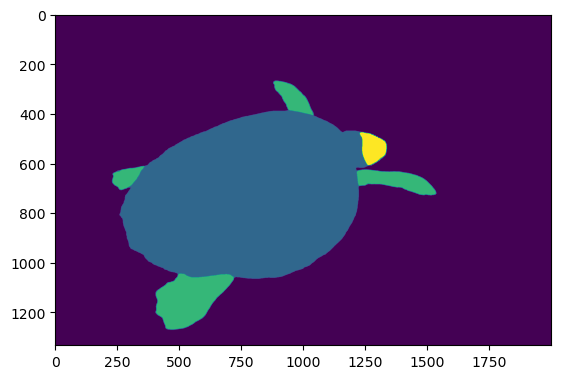

In [127]:
a=np.load('./images_label_id/32_mask.npy')
unique_values, counts = np.unique(a, return_counts=True)
print("Unique values in mask and their counts:", dict(zip(unique_values, counts)))
plt.imshow(a)

In [107]:
# final choice
count = 0
for image_id in range(1,8730):
    try:
        img_info = coco.loadImgs(image_id)[0] 
        file_name = img_info['file_name']
        turtle_mask = coco.getAnnIds(imgIds=image_id, catIds=1, iscrowd=None)        # entire of the turtle
        leg_mask = coco.getAnnIds(imgIds=image_id, catIds=2, iscrowd=None)        # legs of the turtle
        head_mask = coco.getAnnIds(imgIds=image_id, catIds=3, iscrowd=None)        # Head of the turtle
        turtle_mask = coco.loadAnns(turtle_mask)
        leg_mask = coco.loadAnns(leg_mask)
        head_mask = coco.loadAnns(head_mask)
        mask1 = coco.annToMask(turtle_mask[0])
        for i in range(1, len(turtle_mask)):
            mask1 += coco.annToMask(turtle_mask[i])
        mask2 = np.zeros_like(mask1)
        for i in range(len(leg_mask)):
            mask2 += coco.annToMask(leg_mask[i])
        mask3 = np.zeros_like(mask2)
        for i in range(len(head_mask)):
            mask3 += coco.annToMask(head_mask[i])
        mask3[mask3 > 0] = 2
        mask2[mask2 > 0] = 1
        mask1[mask1 > 0] = 1
        mask = mask1 + mask2 
        mask[mask > 1] = 2
        mask = mask + mask3
        mask[mask > 2] = 3
        unique_values, counts = np.unique(mask, return_counts=True)
        if len(unique_values) == 4:
            mask = mask * 85 
            original_file_path = file_name 
            new_file_path = original_file_path.replace('images/', 'images_label_pictures/').replace('.JPG', '.PNG').replace('.jpg', '.PNG').replace('.jpeg', '.PNG')
            os.makedirs(os.path.dirname(new_file_path), exist_ok=True)
            mask_image = Image.fromarray(mask.astype(np.uint8))  
            mask_image.save(new_file_path,format='PNG')
        else:
            count+=1
            print(f'{image_id} components are incomplete.')
    except Exception as e:
        count+=1
        print(f"Error for image_id {image_id}: {e}")
        continue
        
print(count)

56 components are incomplete.
73 components are incomplete.
115 components are incomplete.
211 components are incomplete.
259 components are incomplete.
260 components are incomplete.
275 components are incomplete.
276 components are incomplete.
281 components are incomplete.
443 components are incomplete.
506 components are incomplete.
541 components are incomplete.
610 components are incomplete.
651 components are incomplete.
809 components are incomplete.
837 components are incomplete.
874 components are incomplete.
878 components are incomplete.
883 components are incomplete.
908 components are incomplete.
932 components are incomplete.
933 components are incomplete.
934 components are incomplete.
944 components are incomplete.
956 components are incomplete.
970 components are incomplete.
1085 components are incomplete.
1094 components are incomplete.
1154 components are incomplete.
1234 components are incomplete.
1287 components are incomplete.
1313 components are incomplete.
1316

In [123]:
img_info = coco.loadImgs(4103)[0] 
file_name = img_info['file_name']
turtle_mask = coco.getAnnIds(imgIds=4103, catIds=1, iscrowd=None)        # entire of the turtle
leg_mask = coco.getAnnIds(imgIds=4103, catIds=2, iscrowd=None)        # legs of the turtle
head_mask = coco.getAnnIds(imgIds=4103, catIds=3, iscrowd=None)        # Head of the turtle
turtle_mask = coco.loadAnns(turtle_mask)
leg_mask = coco.loadAnns(leg_mask)
head_mask = coco.loadAnns(head_mask)
mask1 = coco.annToMask(turtle_mask[0])
for i in range(1, len(turtle_mask)):
    mask1 += coco.annToMask(turtle_mask[i])
mask2 = np.zeros_like(mask1)
for i in range(len(leg_mask)):
    mask2 += coco.annToMask(leg_mask[i])
mask3 = np.zeros_like(mask2)
for i in range(len(head_mask)):
    mask3 += coco.annToMask(head_mask[i])
mask3[mask3 > 0] = 2
mask2[mask2 > 0] = 1
mask1[mask1 > 0] = 1
mask = mask1 + mask2 
mask[mask > 1] = 2
mask = mask + mask3
mask[mask > 2] = 3
unique_values, counts = np.unique(mask, return_counts=True)
print(len(unique_values))
print("Unique values in mask and their counts:", dict(zip(unique_values, counts)))

3
Unique values in mask and their counts: {0: 2096373, 1: 391385, 2: 178242}
